In [2]:
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
import matplotlib as mpl
from scipy.interpolate import make_interp_spline
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

import matplotlib.font_manager as fm
fm.fontManager.addfont('/home/qiuyang/workplace/world_map_drawing/Geographical heterogeneity/Geomap/bokeh-app/data/font/times.ttf')

shapefile = '/home/qiuyang/workplace/world_map_drawing/Geographical heterogeneity/Geomap/bokeh-app/data/countries_110m/ne_110m_admin_0_countries.shp'

#Read shapefile using Geopandas
gdf = gpd.read_file(shapefile)[['ADMIN', 'ADM0_A3', 'geometry']]

#Rename columns.
gdf.columns = ['country', 'country_code', 'geometry']
gdf = gdf.drop(gdf.index[159]) # The width of the map

# print(gdf)

# #Drop row corresponding to 'Antarctica'
datafile = '/home/qiuyang/workplace/world_map_drawing/Geographical heterogeneity/Geomap/bokeh-app/data/Geographical name_normalization.csv'
data=pd.read_csv(datafile,usecols=[0,1,2,3],names=['country','normalization','number','count'])# import data
print(data['normalization'])

#Read data to json.
data = gpd.GeoDataFrame(data)
merged = gdf.merge(data,on = 'country',how='left')

print(merged)

#low -> high
colorslist = ['#DDEFB1','#FEF4C0','#FEEEBA','#FEE1AA','#FDC68A','#FBBB7F','#FBBA7E','#F5A374','#EF8F6B','#EB7547','#DF5952','#DC402D','#D83428']
mycmaps = colors.LinearSegmentedColormap.from_list('mylist',colorslist,N=100)

color_bin = np.arange(0,0.5,0.001)
# print(color_bin)
fig,ax = plt.subplots(figsize = (12,8))

merged['coords'] = merged['geometry'].apply(lambda x: x.representative_point().coords[0])

merged.plot(
    column = 'normalization',
    scheme = 'userdefined',
    classification_kwds = {'bins':color_bin},
    cmap = mycmaps,
    edgecolor = 'gray',
    linewidth = 0.5,
    ax = ax,
    missing_kwds={"color":"lightgray","edgecolor": "gray"}
)


plt.xlim(-182,182)
plt.ylim(-58,86)

plt.axis('off')  # Get rid of the axes
# background color
fig.set_facecolor("#EFF5FA")
# Colorbar label
plt.text(-113,-48,'>0.5',family = 'Times New Roman',fontsize = 7)
plt.text(-166,-48,'0',family = 'Times New Roman',fontsize = 7)
plt.text(-140,-48,'0.25',family = 'Times New Roman',fontsize = 7)
plt.text(-160,-52,'Geographical name (s.d.)',family = 'Times New Roman',fontsize = 7)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

# colorbar
sm = plt.cm.ScalarMappable(cmap=mycmaps)
position=fig.add_axes([0.167, 0.185, 0.12, 0.02])# position[xmin,xmax,ymin,ymax]
cb=plt.colorbar(sm,cax=position,orientation='horizontal',drawedges=False)#The direction of colorbar
cb.outline.set_visible(False)
cb.set_ticks([])  # Get rid of the scale

# Box figure
ax1 = fig.add_axes([0.162,0.165,0.128,0.11])# position[xmin,xmax,ymin,ymax]

# f = ax1.boxplot(
#     # The drawing data
#     x = data['normalization'][5:151],
#     vert = False,
#     widths=0.18,
#     patch_artist=True,
#     boxprops = {'color':'gray','facecolor':'white','linewidth':'0.5'},
#     showcaps=False,
#     flierprops = {'marker':'o','markerfacecolor':'black','color':'black','markersize':'0.5'},
#     medianprops= {'linestyle':'-','color':'gray','linewidth':'0.5'},
#     whiskerprops={'color':'gray','linewidth':'0.5'}
#     )

ax1.axis('off')  # Get rid of the scale

x = data['number'][0:10]
y = data['count'][0:10]
# Use scipy. Interpolate. Spline to fit the curve
x_new = np.linspace(x.min(),x.max(),300) #300 represents number of points to make between x.min and x.max
y_smooth = make_interp_spline(x,y)(x_new)

# Normal distribution diagram
ax2 = fig.add_axes([0.16,0.34,0.12,0.09])# position[xmin,xmax,ymin,ymax]
ax2.set(xlim=(0,max(x_new)), ylim=(-0.003,max(y_smooth)+0.001), autoscale_on=False)
# Color mapping fills the area under the curve
a = np.array([color_bin,color_bin])
ax2.imshow(a, interpolation='bicubic', extent=(0,max(x_new), -0.003,max(y_smooth)),cmap=mycmaps,aspect='auto')
# The background color fills part of the area on the curve
ax2.fill_between(x_new,y_smooth,max(y_smooth),color='#EFF5FA')
ax2.plot(x_new,y_smooth,color='gray',linestyle='-',linewidth=0.5)
ax2.axis('off')  # Get rid of the scale



ModuleNotFoundError: No module named 'pandas'

In [2]:
import geopandas as gpd

# 读取 shapefile 文件

shapefile = '/home/qiuyang/workplace/world_map_drawing/ne_110m_admin_0_countries/ne_110m_admin_0_countries.shp'

#Read shapefile using Geopandas
gdf = gpd.read_file(shapefile)[['ADMIN', 'ADM0_A3', 'geometry']]

#Rename columns.
gdf.columns = ['country', 'country_code', 'geometry']
gdf = gdf.drop(gdf.index[159]) # The width of the map

country_list = [] 
# 遍历 'country' 列并打印每个值
for country in gdf['country']:
    country_list.append(country)

print(country_list)



['Fiji', 'United Republic of Tanzania', 'Western Sahara', 'Canada', 'United States of America', 'Kazakhstan', 'Uzbekistan', 'Papua New Guinea', 'Indonesia', 'Argentina', 'Chile', 'Democratic Republic of the Congo', 'Somalia', 'Kenya', 'Sudan', 'Chad', 'Haiti', 'Dominican Republic', 'Russia', 'The Bahamas', 'Falkland Islands', 'Norway', 'Greenland', 'French Southern and Antarctic Lands', 'East Timor', 'South Africa', 'Lesotho', 'Mexico', 'Uruguay', 'Brazil', 'Bolivia', 'Peru', 'Colombia', 'Panama', 'Costa Rica', 'Nicaragua', 'Honduras', 'El Salvador', 'Guatemala', 'Belize', 'Venezuela', 'Guyana', 'Suriname', 'France', 'Ecuador', 'Puerto Rico', 'Jamaica', 'Cuba', 'Zimbabwe', 'Botswana', 'Namibia', 'Senegal', 'Mali', 'Mauritania', 'Benin', 'Niger', 'Nigeria', 'Cameroon', 'Togo', 'Ghana', 'Ivory Coast', 'Guinea', 'Guinea-Bissau', 'Liberia', 'Sierra Leone', 'Burkina Faso', 'Central African Republic', 'Republic of the Congo', 'Gabon', 'Equatorial Guinea', 'Zambia', 'Malawi', 'Mozambique', 'e

In [76]:
x = data['number'][0:10]
y = data['count'][0:10]
# Use scipy. Interpolate. Spline to fit the curve
x_new = np.linspace(x.min(),x.max(),300) #300 represents number of points to make between x.min and x.max
y_smooth = make_interp_spline(x,y)(x_new)
fig, ax2=plt.subplots(1,1,figsize=[100, 40])
# Normal distribution diagram
ax2 = fig.add_axes([0.16,0.34,0.12,0.09])# position[xmin,xmax,ymin,ymax]
ax2.set(xlim=(0,max(x_new)), ylim=(-0.003,max(y_smooth)+0.001), autoscale_on=False)
# Color mapping fills the area under the curve
a = np.array([color_bin,color_bin])
ax2.imshow(a, interpolation='bicubic', extent=(0,max(x_new), -0.003,max(y_smooth)),cmap=mycmaps,aspect='auto')
# The background color fills part of the area on the curve
ax2.fill_between(x_new,y_smooth,max(y_smooth),color='#EFF5FA')
ax2.plot(x_new,y_smooth,color='gray',linestyle='-',linewidth=0.5)
ax2.axis('off')  # Get rid of the scale

plt.show()
plt.savefig('/home/qiuyang/workplace/world_map_drawing/Geographical heterogeneity/figures/result_mycmaps_dpi=150.jpg', bbox_inches='tight', pad_inches = 0,dpi=150)
# plt.savefig('picture/result_mycmaps_dpi=150.png', bbox_inches='tight', pad_inches = 0,dpi=150)
# plt.savefig('picture/result_mycmaps_dpi=150.tiff', bbox_inches='tight', pad_inches = 0,dpi=150)

KeyError: 'number'

In [3]:
# 打开文本文件
with open('/home/qiuyang/workplace/world_map_drawing/Geographical heterogeneity/draw_data/lhg_country_name(1gai).txt', 'r', encoding='utf-8') as file:
    # 逐行读取文件，并将每一行添加到列表中
    lines = [line.strip() for line in file.readlines()]

# 打印列表中的内容（可选）
print(lines)

zhuan_dict = {"The Democratic Republic of Congo":"Democratic Republic of the Congo",
              "Congo":"Republic of the Congo",
              "Bahamas":"The Bahamas",
              "the Comoros":"Comoros",
              "Eswatini":"eSwatini",
              "Côte d'Ivoire":"Cote d'Ivoire",
              "Micronesia":'Micronesia, Fed. St. ',
              "Serbia":"Republic of Serbia",
              "Tanzania":"United Republic of Tanzania",
              "Türkiye":"Turkey",
              "Antigua and Barbuda":"Antigua & Barbuda ",
              "Saint Kitts and Nevis":"Saint Kitts & Nevis",
              "the United States":"United States of America",
              "Sao Tome and Principe":"Sao Tome & Principe",
              "Timor-Leste":"East Timor",
              }

zhuanhuahou = []
for country in lines:
    if country in zhuan_dict:
        zhuanhuahou.append(zhuan_dict[country])
    else:
        zhuanhuahou.append(country)

import csv

# 创建一个空列表来保存第一列的数据
first_column = []

# 打开 CSV 文件
with open('/home/qiuyang/workplace/world_map_drawing/Geographical heterogeneity/Geomap/bokeh-app/data/Geographical name_normalization.csv', 'r', newline='', encoding='utf-8') as csvfile:
    # 使用 csv.reader 读取 CSV 文件
    csv_reader = csv.reader(csvfile)
    # 逐行读取 CSV 文件
    for row in csv_reader:
        # 将每一行的第一列数据添加到列表中
        first_column.append(row[0])

# 打印第一列的数据（可选）
print(first_column)

meichuxian = []

for country in zhuanhuahou:
    if country not in first_column:
        meichuxian.append(country)

print(len(zhuanhuahou))



['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'Brunei', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Cape Verde', 'Cambodia', 'Cameroon', 'Canada', 'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia', 'the Comoros', 'Congo', 'Costa Rica', "Côte d'Ivoire", 'Croatia', 'Cuba', 'Cyprus', 'Czech Republic', 'North Korea', 'The Democratic Republic of Congo', 'Denmark', 'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia', 'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France', 'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece', 'Grenada', 'Guatemala', 'Guinea', 'Guinea-Bissau', 'Guyana', 'Haiti', 'Honduras', 'Hungary', 'Iceland', 'India', 'Indonesia', 'Iran', 

0        34
1       346
2       152
3        21
4      3058
       ... 
198       0
199       0
200       0
201       0
202       0
Name: normalization, Length: 203, dtype: int64
                         country country_code  \
0                           Fiji          FJI   
1    United Republic of Tanzania          TZA   
2                 Western Sahara          SAH   
3                         Canada          CAN   
4       United States of America          USA   
..                           ...          ...   
171           Republic of Serbia          SRB   
172                   Montenegro          MNE   
173                       Kosovo          KOS   
174          Trinidad and Tobago          TTO   
175                  South Sudan          SDS   

                                              geometry  normalization  
0    MULTIPOLYGON (((180 -16.06713, 180 -16.55522, ...              8  
1    POLYGON ((33.90371 -0.95, 34.07262 -1.05982, 3...             25  
2    POLYGON ((-

(np.float64(0.0), np.float64(1.0), np.float64(0.0), np.float64(1.0))

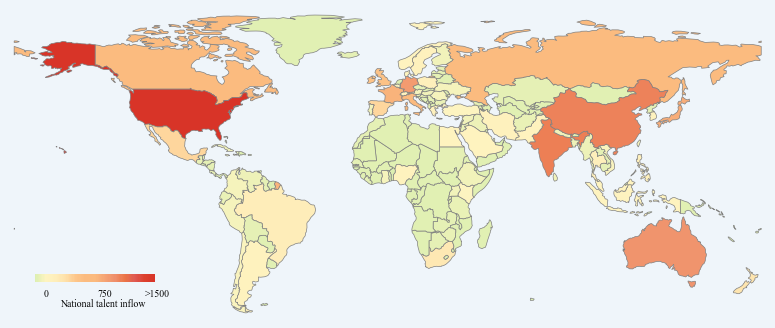

In [7]:
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
import matplotlib as mpl
from scipy.interpolate import make_interp_spline
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

import matplotlib.font_manager as fm
fm.fontManager.addfont('/home/qiuyang/workplace/world_map_drawing/Geographical heterogeneity/Geomap/bokeh-app/data/font/times.ttf')

shapefile = '/home/qiuyang/workplace/world_map_drawing/Geographical heterogeneity/Geomap/bokeh-app/data/countries_110m/ne_110m_admin_0_countries.shp'

#Read shapefile using Geopandas
gdf = gpd.read_file(shapefile)[['ADMIN', 'ADM0_A3', 'geometry']]

#Rename columns.
gdf.columns = ['country', 'country_code', 'geometry']
gdf = gdf.drop(gdf.index[159]) # The width of the map

# print(gdf)

# #Drop row corresponding to 'Antarctica'
datafile = '/home/qiuyang/workplace/world_map_drawing/Geographical heterogeneity/Geomap/bokeh-app/data/chudu.csv'
data=pd.read_csv(datafile,usecols=[0,1],names=['country','normalization'])# import data
print(data['normalization'])

#Read data to json.
data = gpd.GeoDataFrame(data)
merged = gdf.merge(data,on = 'country',how='left')

print(merged)

#low -> high
colorslist = ['#DDEFB1','#FEF4C0','#FEEEBA','#FEE1AA','#FDC68A','#FBBB7F','#FBBA7E','#F5A374','#EF8F6B','#EB7547','#DF5952','#DC402D','#D83428']
mycmaps = colors.LinearSegmentedColormap.from_list('mylist',colorslist,N=100)

color_bin = np.arange(0,1000,10)
# print(color_bin)
fig,ax = plt.subplots(figsize = (10,4))

merged['coords'] = merged['geometry'].apply(lambda x: x.representative_point().coords[0])

merged.plot(
    column = 'normalization',
    scheme = 'userdefined',
    classification_kwds = {'bins':color_bin},
    cmap = mycmaps,
    edgecolor = 'gray',
    linewidth = 0.5,
    ax = ax,
    missing_kwds={"color":"lightgray","edgecolor": "gray"}
)


plt.xlim(-182,182)
plt.ylim(-58,86)

plt.axis('off')  # Get rid of the axes
# background color
fig.set_facecolor("#EFF5FA")
# Colorbar label
plt.text(-117,-48,'>1500',family = 'Times New Roman',fontsize = 7)
plt.text(-166,-48,'0',family = 'Times New Roman',fontsize = 7)
plt.text(-140,-48,'750',family = 'Times New Roman',fontsize = 7)
plt.text(-158,-53,'National talent inflow',family = 'Times New Roman',fontsize = 7)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

# colorbar
sm = plt.cm.ScalarMappable(cmap=mycmaps)
position=fig.add_axes([0.16, 0.20, 0.12, 0.02])# position[xmin,xmax,ymin,ymax]
cb=plt.colorbar(sm,cax=position,orientation='horizontal',drawedges=False)#The direction of colorbar
cb.outline.set_visible(False)
cb.set_ticks([])  # Get rid of the scale

# Box figure
ax1 = fig.add_axes([0.162,0.165,0.128,0.11])# position[xmin,xmax,ymin,ymax]

ax1.axis('off')  # Get rid of the scale




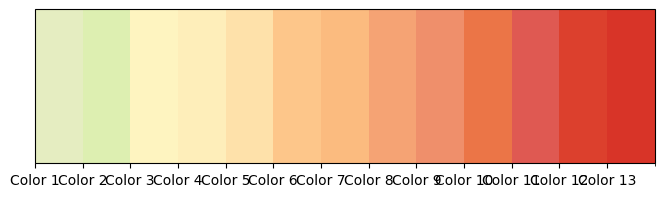

In [8]:
import matplotlib.pyplot as plt
import numpy as np

# 定义颜色列表
colorslist = ['#E5EDC1','#DDEFB1','#FEF4C0','#FEEEBA','#FEE1AA','#FDC68A','#FBBB7F','#F5A374','#EF8F6B','#EB7547','#DF5952','#DC402D','#D83428']

# 创建一个图像和轴对象
fig, ax = plt.subplots(figsize=(8, 2))

# 创建一个颜色映射
cmap = plt.cm.colors.ListedColormap(colorslist)

# 创建一个规范化对象
norm = plt.cm.colors.BoundaryNorm(np.arange(len(colorslist) + 1), cmap.N)

# 创建颜色条
cb = plt.colorbar(
    plt.cm.ScalarMappable(norm=norm, cmap=cmap),
    cax=ax,
    orientation='horizontal',
    ticks=np.arange(len(colorslist)),
    boundaries=np.arange(len(colorslist) + 1) - 0.5
)

# 设置颜色条的标签
cb.set_ticklabels([f'Color {i+1}' for i in range(len(colorslist))])

# 显示图像
plt.show()


                         country country_code  \
0                           Fiji          FJI   
1    United Republic of Tanzania          TZA   
2                 Western Sahara          SAH   
3                         Canada          CAN   
4       United States of America          USA   
..                           ...          ...   
171           Republic of Serbia          SRB   
172                   Montenegro          MNE   
173                       Kosovo          KOS   
174          Trinidad and Tobago          TTO   
175                  South Sudan          SDS   

                                              geometry  normalization  
0    MULTIPOLYGON (((180 -16.06713, 180 -16.55522, ...          461.0  
1    POLYGON ((33.90371 -0.95, 34.07262 -1.05982, 3...         1210.0  
2    POLYGON ((-8.66559 27.65643, -8.66512 27.58948...            NaN  
3    MULTIPOLYGON (((-122.84 49, -122.97421 49.0025...        20788.0  
4    MULTIPOLYGON (((-122.84 49, -120 49, -117.0312

(-60.0, 90.0)

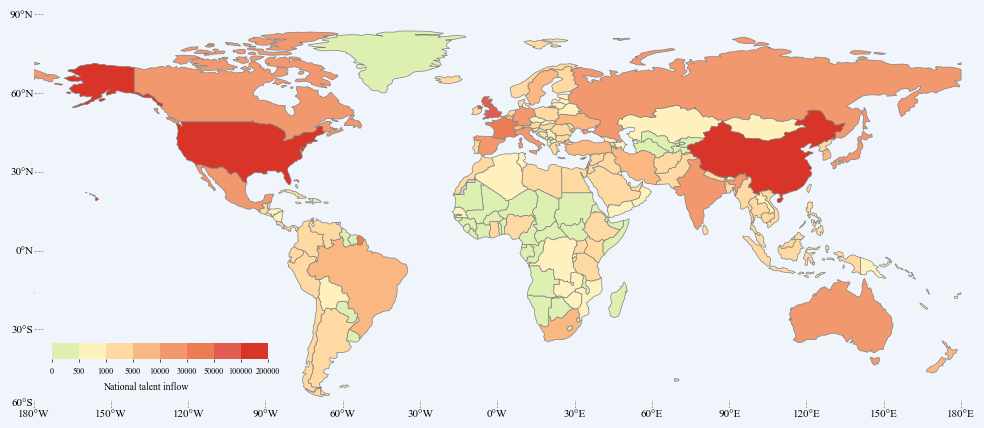

In [9]:
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
import matplotlib as mpl
from scipy.interpolate import make_interp_spline
import os
import matplotlib.cm as cm
from matplotlib.transforms import Bbox
os.environ['KMP_DUPLICATE_LIB_OK']='True'

import matplotlib.font_manager as fm
fm.fontManager.addfont('/home/qiuyang/workplace/world_map_drawing/Geographical heterogeneity/Geomap/bokeh-app/data/font/times.ttf')

shapefile = '/home/qiuyang/workplace/world_map_drawing/Geographical heterogeneity/Geomap/bokeh-app/data/countries_110m/ne_110m_admin_0_countries.shp'
plt.rcParams['font.family'] = 'Times New Roman'
#Read shapefile using Geopandas
gdf = gpd.read_file(shapefile)[['ADMIN', 'ADM0_A3', 'geometry']]

#Rename columns.
gdf.columns = ['country', 'country_code', 'geometry']
gdf = gdf.drop(gdf.index[159]) # The width of the map

# print(gdf)

# #Drop row corresponding to 'Antarctica'
datafile = '/home/qiuyang/workplace/world_map_drawing/Geographical heterogeneity/Geomap/bokeh-app/data/rudu1.csv'
data=pd.read_csv(datafile,usecols=[0,1],names=['country','normalization'])# import data
# 遍历每一行并打印normalization列的值


#Read data to json.
data = gpd.GeoDataFrame(data)
merged = gdf.merge(data,on = 'country',how='left')
print(merged)
# print(merged)

# print(color_bin)
fig,ax = plt.subplots(figsize = (12,8))

merged['coords'] = merged['geometry'].apply(lambda x: x.representative_point().coords[0])

#我的色带
# color_bin = np.arange(0,1000,10)
color_bin = [0,500,1000,5000,10000,30000,50000,100000,200000]

#low -> high
colorslist = ['#DDEFB1','#FEF4C0','#FEE1AA','#FDC68A','#F5A374','#EF8F6B','#EB7547','#DF5952','#D83428']
# colorslist = ['#DDEFB1','#FEF4C0','#FEEEBA','#FEE1AA','#FDC68A','#FBBB7F','#F5A374','#EF8F6B','#EB7547','#DF5952','#DC402D','#D83428']
mycmaps = colors.LinearSegmentedColormap.from_list('mylist',colorslist,N=8)

merged.plot(
    column = 'normalization',
    scheme = 'userdefined',
    classification_kwds = {'bins':color_bin},
    cmap = mycmaps,
    edgecolor = 'gray',
    linewidth = 0.5,
    ax = ax,
    missing_kwds={"color":"lightgray","edgecolor": "gray"}
)


plt.xlim(-182,182)
plt.ylim(-90,90)

plt.axis('off')  # Get rid of the axes
# background color
fig.set_facecolor("#EFF5FA")
# Colorbar label
# plt.text(-117,-48,'>1500',family = 'Times New Roman',fontsize = 7)
# plt.text(-166,-48,'0',family = 'Times New Roman',fontsize = 7)
# plt.text(-140,-48,'750',family = 'Times New Roman',fontsize = 7)
plt.text(-153,-53,'National talent inflow',family = 'Times New Roman',fontsize = 7)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)


# colorbar
bins = [0,500,1000,5000,10000,30000,50000,100000,200000]
nbin = len(colorslist) - 1
# cmap4 = mpl.colors.ListedColormap(colorslist)

norm4 = mpl.colors.BoundaryNorm(bins, nbin)
im4 = mpl.cm.ScalarMappable(norm=norm4, cmap=mycmaps)
position=fig.add_axes([0.14, 0.31, 0.18, 0.02]) # outflow 
# position=fig.add_axes([0.14, 0.195, 0.18, 0.02])  # inflow
cb = fig.colorbar(
    im4, cax=position, orientation='horizontal',drawedges=False
)
cb.outline.set_visible(False)


# 设置刻度位置和标签
cb.set_ticks([0,500,1000,5000,10000,30000,50000,100000,200000])
cb.set_ticklabels(['0','500','1000','5000','10000','30000','50000','100000','200000'])

# 调整刻度大小和字体
# cb.ax.tick_params(labelsize=6, length=2, width=0.5, labelfontfamily='Times New Roman')
cb.ax.tick_params(labelsize=6, length=2, width=0.5)


# cb.set_ticks([])  # Get rid of the scale


# 绘制经度线
longitudes = np.arange(-180, 181, 30)
for lon in longitudes:
    ax.axvline(x=lon, color='gray', linestyle='--', linewidth=0.5,ymax=0.02)
    lon_label = str(lon) + "°E" if lon > 0 else str(-lon) + "°W"
    ax.text(lon, -60, lon_label, va='top', ha='center', fontsize=8,family = 'Times New Roman')

# 绘制纬度线
latitudes = np.arange(-60, 91, 30)
for lat in latitudes:   
    ax.axhline(y=lat, color='gray', linestyle='--', linewidth=0.5,xmax=0.01)
    lat_label = str(lat) + "°N" if lat >= 0 else str(-lat) + "°S"
    if lat == -60:
        ax.text(-180, lat+4, lat_label, va='top', ha='right', fontsize=8,family = 'Times New Roman')
    else:
        ax.text(-180, lat, lat_label, va='center', ha='right', fontsize=8,family = 'Times New Roman')

# 设置刻度范围
ax.set_xlim(-180, 181)
ax.set_ylim(-60, 90)


# # 调整刻度字的位置
# ax.xaxis.set_label_coords(5, 5)
# ax.yaxis.set_label_coords(-0.1, 0.5)



In [10]:
#ab图
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
import matplotlib as mpl
from scipy.interpolate import make_interp_spline
import os
import matplotlib.cm as cm
from matplotlib.transforms import Bbox
os.environ['KMP_DUPLICATE_LIB_OK']='True'

import matplotlib.font_manager as fm
fm.fontManager.addfont('/home/qiuyang/workplace/world_map_drawing/Geographical heterogeneity/Geomap/bokeh-app/data/font/times.ttf')

shapefile = '/home/qiuyang/workplace/world_map_drawing/Geographical heterogeneity/Geomap/bokeh-app/data/countries_110m/ne_110m_admin_0_countries.shp'
plt.rcParams['font.family'] = 'Times New Roman'
#Read shapefile using Geopandas
gdf = gpd.read_file(shapefile)[['ADMIN', 'ADM0_A3', 'geometry']]

#Rename columns.
gdf.columns = ['country', 'country_code', 'geometry']
gdf = gdf.drop(gdf.index[159]) # The width of the map

# print(gdf)

#下面的注释了
# # #Drop row corresponding to 'Antarctica'
# datafile = '/home/qiuyang/workplace/world_map_drawing/Geographical heterogeneity/Geomap/bokeh-app/data/rudu1.csv'
# data=pd.read_csv(datafile,usecols=[0,1],names=['country','normalization'])# import data
# # 遍历每一行并打印normalization列的值


# #Read data to json.
# data = gpd.GeoDataFrame(data)
# merged = gdf.merge(data,on = 'country',how='left')
# print(merged)
# # print(merged)

def plotA(ax):
    # #Drop row corresponding to 'Antarctica'
    datafile = '/home/qiuyang/workplace/world_map_drawing/Geographical heterogeneity/Geomap/bokeh-app/data/chudu1.csv'
    data=pd.read_csv(datafile,usecols=[0,1],names=['country','normalization'])# import data
    # 遍历每一行并打印normalization列的值


    #Read data to json.
    data = gpd.GeoDataFrame(data)
    merged = gdf.merge(data,on = 'country',how='left')
    print(merged)

    merged['coords'] = merged['geometry'].apply(lambda x: x.representative_point().coords[0])

    #我的色带
    # color_bin = np.arange(0,1000,10)
    color_bin = [0,500,1000,5000,10000,30000,50000,100000,200000]

    #low -> high
    colorslist = ['#DDEFB1','#FEF4C0','#FEE1AA','#FDC68A','#F5A374','#EF8F6B','#EB7547','#DF5952','#D83428']
    # colorslist = ['#DDEFB1','#FEF4C0','#FEEEBA','#FEE1AA','#FDC68A','#FBBB7F','#F5A374','#EF8F6B','#EB7547','#DF5952','#DC402D','#D83428']
    mycmaps = colors.LinearSegmentedColormap.from_list('mylist',colorslist,N=8)

    merged.plot(
        column = 'normalization',
        scheme = 'userdefined',
        classification_kwds = {'bins':color_bin},
        cmap = mycmaps,
        edgecolor = 'gray',
        linewidth = 0.5,
        ax = ax,
        missing_kwds={"color":"lightgray","edgecolor": "gray"}
    )


    ax.set_xlim(-182,182)
    ax.set_ylim(-90,90)

    ax.axis('off')  # Get rid of the axes
    # background color
    fig.set_facecolor("#EFF5FA")
    # Colorbar label
    # plt.text(-117,-48,'>1500',family = 'Times New Roman',fontsize = 7)
    # plt.text(-166,-48,'0',family = 'Times New Roman',fontsize = 7)
    # plt.text(-140,-48,'750',family = 'Times New Roman',fontsize = 7)
    ax.text(-153,-53,'Frequency of brain drain',family = 'Times New Roman',fontsize = 7)

    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)


    # colorbar
    bins = [0,500,1000,5000,10000,30000,50000,100000,200000]
    nbin = len(colorslist) - 1
    # cmap4 = mpl.colors.ListedColormap(colorslist)

    norm4 = mpl.colors.BoundaryNorm(bins, nbin)
    im4 = mpl.cm.ScalarMappable(norm=norm4, cmap=mycmaps)
    position=fig.add_axes([0.257, 0.572, 0.136, 0.018]) # outflow 
    # position=fig.add_axes([0.14, 0.195, 0.18, 0.02])  # inflow
    cb = fig.colorbar(
        im4, cax=position, orientation='horizontal',drawedges=False
    )
    cb.outline.set_visible(False)


    # 设置刻度位置和标签
    cb.set_ticks([0,500,1000,5000,10000,30000,50000,100000,200000])
    cb.set_ticklabels(['0','500','1000','5000','10000','30000','50000','100000','200000'])

    # 调整刻度大小和字体
    # cb.ax.tick_params(labelsize=6, length=2, width=0.5, labelfontfamily='Times New Roman')
    cb.ax.tick_params(labelsize=6, length=2, width=0.5)


    # cb.set_ticks([])  # Get rid of the scale


    # 绘制经度线
    longitudes = np.arange(-180, 181, 30)
    for lon in longitudes:
        ax.axvline(x=lon, color='gray', linestyle='--', linewidth=0.5,ymax=0.02)
        lon_label = str(lon) + "°E" if lon > 0 else str(-lon) + "°W"
        ax.text(lon, -60, lon_label, va='top', ha='center', fontsize=8,family = 'Times New Roman')

    # 绘制纬度线
    latitudes = np.arange(-60, 91, 30)
    for lat in latitudes:   
        ax.axhline(y=lat, color='gray', linestyle='--', linewidth=0.5,xmax=0.01)
        lat_label = str(lat) + "°N" if lat >= 0 else str(-lat) + "°S"
        if lat == -60:
            ax.text(-180, lat+4, lat_label, va='top', ha='right', fontsize=8,family = 'Times New Roman')
        else:
            ax.text(-180, lat, lat_label, va='center', ha='right', fontsize=8,family = 'Times New Roman')

    # 设置刻度范围
    ax.set_xlim(-180, 181)
    ax.set_ylim(-60, 90)

def plotB(ax):
    # #Drop row corresponding to 'Antarctica'
    datafile = '/home/qiuyang/workplace/world_map_drawing/Geographical heterogeneity/Geomap/bokeh-app/data/rudu1.csv'
    data=pd.read_csv(datafile,usecols=[0,1],names=['country','normalization'])# import data
    # 遍历每一行并打印normalization列的值


    #Read data to json.
    data = gpd.GeoDataFrame(data)
    merged = gdf.merge(data,on = 'country',how='left')
    print(merged)

    merged['coords'] = merged['geometry'].apply(lambda x: x.representative_point().coords[0])

    #我的色带
    # color_bin = np.arange(0,1000,10)
    color_bin = [0,500,1000,5000,10000,30000,50000,100000,200000]

    #low -> high
    colorslist = ['#DDEFB1','#FEF4C0','#FEE1AA','#FDC68A','#F5A374','#EF8F6B','#EB7547','#DF5952','#D83428']
    # colorslist = ['#DDEFB1','#FEF4C0','#FEEEBA','#FEE1AA','#FDC68A','#FBBB7F','#F5A374','#EF8F6B','#EB7547','#DF5952','#DC402D','#D83428']
    mycmaps = colors.LinearSegmentedColormap.from_list('mylist',colorslist,N=8)

    merged.plot(
        column = 'normalization',
        scheme = 'userdefined',
        classification_kwds = {'bins':color_bin},
        cmap = mycmaps,
        edgecolor = 'gray',
        linewidth = 0.5,
        ax = ax,
        missing_kwds={"color":"lightgray","edgecolor": "gray"}
    )

    
    ax.set_xlim(-182,182)
    ax.set_ylim(-90,90)

    ax.axis('off')  # Get rid of the axes
    # background color
    fig.set_facecolor("#EFF5FA")
    # Colorbar label
    # plt.text(-117,-48,'>1500',family = 'Times New Roman',fontsize = 7)
    # plt.text(-166,-48,'0',family = 'Times New Roman',fontsize = 7)
    # plt.text(-140,-48,'750',family = 'Times New Roman',fontsize = 7)
    ax.text(-153,-53,'Frequency of brain gain',family = 'Times New Roman',fontsize = 7)

    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)


    # colorbar
    bins = [0,500,1000,5000,10000,30000,50000,100000,200000]
    nbin = len(colorslist) - 1
    # cmap4 = mpl.colors.ListedColormap(colorslist)

    norm4 = mpl.colors.BoundaryNorm(bins, nbin)
    im4 = mpl.cm.ScalarMappable(norm=norm4, cmap=mycmaps)
    # position=fig.add_axes([0.257, 0.572, 0.136, 0.018]) # outflow 
    position=fig.add_axes([0.257, 0.152, 0.136, 0.02])  # inflow
    cb = fig.colorbar(
        im4, cax=position, orientation='horizontal',drawedges=False
    )
    cb.outline.set_visible(False)


    # 设置刻度位置和标签
    cb.set_ticks([0,500,1000,5000,10000,30000,50000,100000,200000])
    cb.set_ticklabels(['0','500','1000','5000','10000','30000','50000','100000','200000'])

    # 调整刻度大小和字体
    # cb.ax.tick_params(labelsize=6, length=2, width=0.5, labelfontfamily='Times New Roman')
    cb.ax.tick_params(labelsize=6, length=2, width=0.5)


    # cb.set_ticks([])  # Get rid of the scale


    # 绘制经度线
    longitudes = np.arange(-180, 181, 30)
    for lon in longitudes:
        ax.axvline(x=lon, color='gray', linestyle='--', linewidth=0.5,ymax=0.02)
        lon_label = str(lon) + "°E" if lon > 0 else str(-lon) + "°W"
        ax.text(lon, -60, lon_label, va='top', ha='center', fontsize=8,family = 'Times New Roman')

    # 绘制纬度线
    latitudes = np.arange(-60, 91, 30)
    for lat in latitudes:   
        ax.axhline(y=lat, color='gray', linestyle='--', linewidth=0.5,xmax=0.01)
        lat_label = str(lat) + "°N" if lat >= 0 else str(-lat) + "°S"
        if lat == -60:
            ax.text(-180, lat+4, lat_label, va='top', ha='right', fontsize=8,family = 'Times New Roman')
        else:
            ax.text(-180, lat, lat_label, va='center', ha='right', fontsize=8,family = 'Times New Roman')

    # 设置刻度范围
    ax.set_xlim(-180, 181)
    ax.set_ylim(-60, 90)




                         country country_code  \
0                           Fiji          FJI   
1    United Republic of Tanzania          TZA   
2                 Western Sahara          SAH   
3                         Canada          CAN   
4       United States of America          USA   
..                           ...          ...   
171           Republic of Serbia          SRB   
172                   Montenegro          MNE   
173                       Kosovo          KOS   
174          Trinidad and Tobago          TTO   
175                  South Sudan          SDS   

                                              geometry  normalization  
0    MULTIPOLYGON (((180 -16.06713, 180 -16.55522, ...          291.0  
1    POLYGON ((33.90371 -0.95, 34.07262 -1.05982, 3...         1047.0  
2    POLYGON ((-8.66559 27.65643, -8.66512 27.58948...            4.0  
3    MULTIPOLYGON (((-122.84 49, -122.97421 49.0025...        22428.0  
4    MULTIPOLYGON (((-122.84 49, -120 49, -117.0312

Text(0.219, 0.5, 'b')

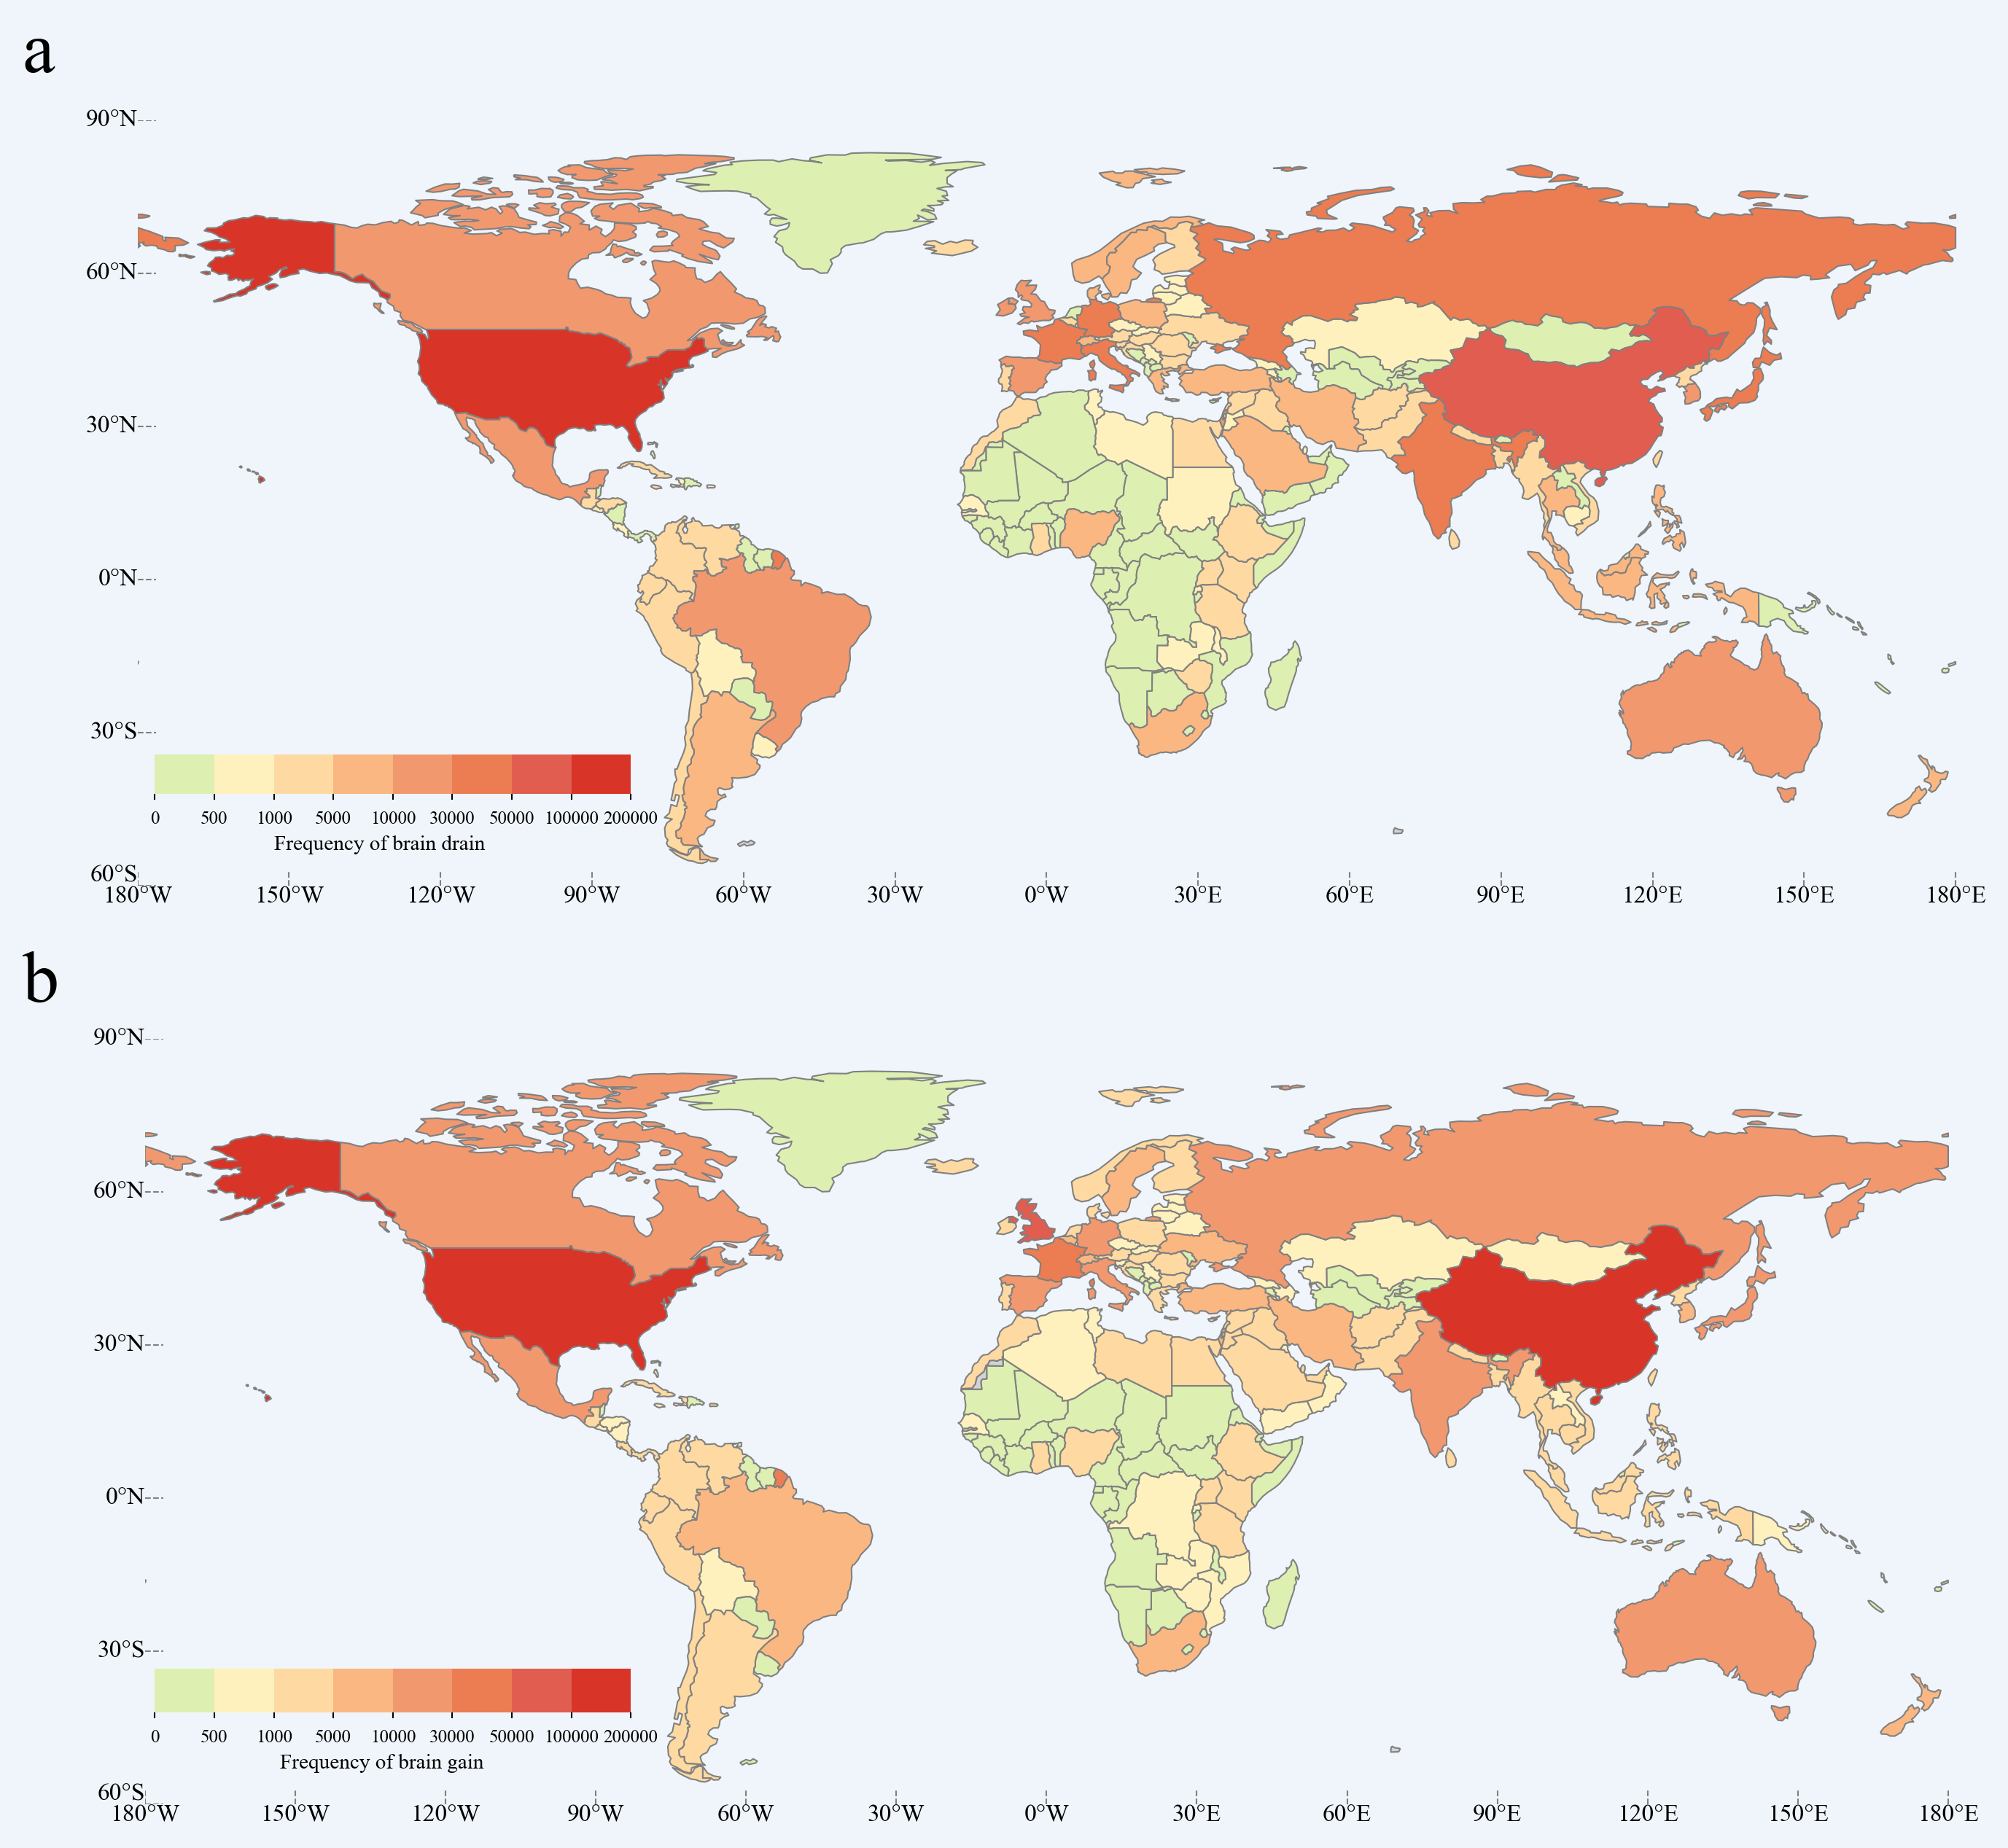

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl


plt.rcParams['figure.dpi'] = 300

fig, axs = plt.subplots(2,1, figsize=(16, 10))


plotA(axs[0])
plotB(axs[1])

# # 添加X轴标签
# axs.set_xlabel('Count', fontsize=20, labelpad=30)
# # 添加y轴标签
# axs.set_ylabel('Continent Domain', fontsize=20, labelpad=90)

# fig.subplots_adjust(wspace=0.26, hspace=0.22)

fig.text(0.219, 0.925, 'a', fontsize=24, va='top', fontweight='bold')
fig.text(0.219, 0.5, 'b', fontsize=24, va='top', fontweight='bold')

0        28
1      3934
2       541
3        27
4        31
       ... 
208       0
209       0
210       0
211       0
212       0
Name: normalization, Length: 213, dtype: int64


(-60.0, 90.0)

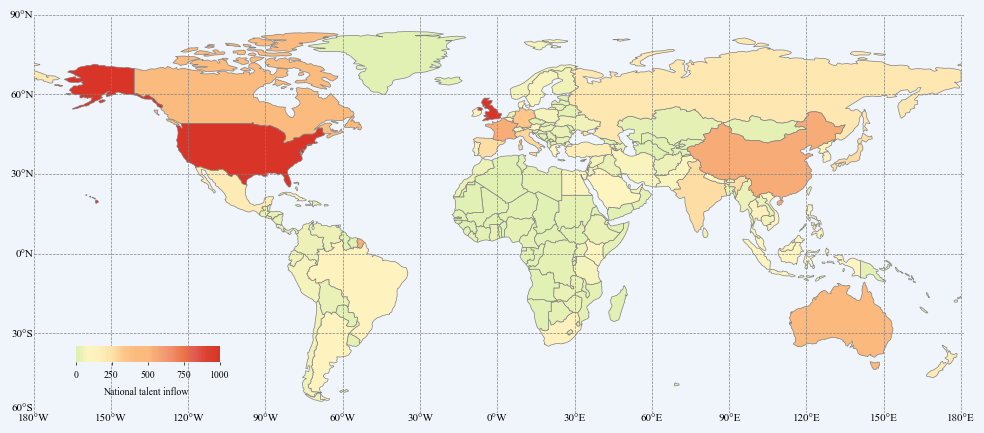

In [38]:
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
import matplotlib as mpl
from scipy.interpolate import make_interp_spline
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

import matplotlib.font_manager as fm
fm.fontManager.addfont('/home/qiuyang/workplace/world_map_drawing/Geographical heterogeneity/Geomap/bokeh-app/data/font/times.ttf')

shapefile = '/home/qiuyang/workplace/world_map_drawing/Geographical heterogeneity/Geomap/bokeh-app/data/countries_110m/ne_110m_admin_0_countries.shp'

#Read shapefile using Geopandas
gdf = gpd.read_file(shapefile)[['ADMIN', 'ADM0_A3', 'geometry']]

#Rename columns.
gdf.columns = ['country', 'country_code', 'geometry']
gdf = gdf.drop(gdf.index[159]) # The width of the map

# print(gdf)

# #Drop row corresponding to 'Antarctica'
datafile = '/home/qiuyang/workplace/world_map_drawing/Geographical heterogeneity/Geomap/bokeh-app/data/rudu.csv'
data=pd.read_csv(datafile,usecols=[0,1],names=['country','normalization'])# import data
print(data['normalization'])

#Read data to json.
data = gpd.GeoDataFrame(data)
merged = gdf.merge(data,on = 'country',how='left')

# print(merged)

# print(color_bin)
fig,ax = plt.subplots(figsize = (12,8))

merged['coords'] = merged['geometry'].apply(lambda x: x.representative_point().coords[0])

#我的色带
color_bin = np.arange(0,1000,10)

#low -> high
colorslist = ['#DDEFB1','#FEF4C0','#FEEEBA','#FEE1AA','#FDC68A','#FBBB7F','#FBBA7E','#F5A374','#EF8F6B','#EB7547','#DF5952','#DC402D','#D83428']
mycmaps = colors.LinearSegmentedColormap.from_list('mylist',colorslist,N=100)

merged.plot(
    column = 'normalization',
    scheme = 'userdefined',
    classification_kwds = {'bins':color_bin},
    cmap = mycmaps,
    edgecolor = 'gray',
    linewidth = 0.5,
    ax = ax,
    missing_kwds={"color":"lightgray","edgecolor": "gray"}
)


plt.xlim(-182,182)
plt.ylim(-90,90)

plt.axis('off')  # Get rid of the axes
# background color
fig.set_facecolor("#EFF5FA")
# Colorbar label
# plt.text(-117,-48,'>1500',family = 'Times New Roman',fontsize = 7)
# plt.text(-166,-48,'0',family = 'Times New Roman',fontsize = 7)
# plt.text(-140,-48,'750',family = 'Times New Roman',fontsize = 7)
plt.text(-153,-53,'National talent inflow',family = 'Times New Roman',fontsize = 7)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)


# colorbar
norm = plt.Normalize(vmin=1, vmax=1001)

sm = plt.cm.ScalarMappable(cmap=mycmaps,norm=norm)
position=fig.add_axes([0.16, 0.31, 0.12, 0.02])# position[xmin,xmax,ymin,ymax]
cb=plt.colorbar(sm,cax=position,orientation='horizontal',drawedges=False)#The direction of colorbar
cb.outline.set_visible(False)

# 设置刻度位置和标签
cb.set_ticks([0, 250, 500, 750, 1000])
cb.set_ticklabels(['0', '250', '500', '750', '1000'])

# 调整刻度大小和字体
cb.ax.tick_params(labelsize=7, length=2, width=0.5, labelfontfamily='Times New Roman')

# cb.set_ticks([])  # Get rid of the scale

# 绘制经度线
longitudes = np.arange(-180, 181, 30)
for lon in longitudes:
    ax.axvline(x=lon, color='gray', linestyle='--', linewidth=0.5)
    lon_label = str(lon) + "°E" if lon > 0 else str(-lon) + "°W"
    ax.text(lon, -60, lon_label, va='top', ha='center', fontsize=8,family = 'Times New Roman')

# 绘制纬度线
latitudes = np.arange(-60, 91, 30)
for lat in latitudes:
    ax.axhline(y=lat, color='gray', linestyle='--', linewidth=0.5)
    lat_label = str(lat) + "°N" if lat >= 0 else str(-lat) + "°S"
    if lat == -60:
        ax.text(-180, lat+4, lat_label, va='top', ha='right', fontsize=8,family = 'Times New Roman')
    else:
        ax.text(-180, lat, lat_label, va='center', ha='right', fontsize=8,family = 'Times New Roman')

# 设置刻度范围
ax.set_xlim(-180, 181)
ax.set_ylim(-60, 90)


# # 调整刻度字的位置
# ax.xaxis.set_label_coords(5, 5)
# ax.yaxis.set_label_coords(-0.1, 0.5)



In [8]:
import geopandas as gpd
from shapely.geometry import Polygon, MultiPolygon
from geopy.distance import great_circle
import matplotlib.font_manager as fm
fm.fontManager.addfont('/home/qiuyang/workplace/world_map_drawing/Geographical heterogeneity/Geomap/bokeh-app/data/font/times.ttf')

shapefile = '/home/qiuyang/workplace/world_map_drawing/Geographical heterogeneity/Geomap/bokeh-app/data/countries_110m/ne_110m_admin_0_countries.shp'
plt.rcParams['font.family'] = 'Times New Roman'
#Read shapefile using Geopandas
gdf = gpd.read_file(shapefile)[['ADMIN', 'ADM0_A3', 'geometry']]

#Rename columns.
gdf.columns = ['country', 'country_code', 'geometry']
gdf = gdf.drop(gdf.index[159]) # The width of the map
# 定义大洲和国家的对应关系
continent_map = {
    'Asia': ['Kazakhstan', 'Uzbekistan', 'Indonesia', 'India', 'Bangladesh', 'Bhutan', 'Nepal', 'Pakistan', 'Afghanistan', 'Tajikistan', 'Kyrgyzstan', 'Turkmenistan', 'Iran', 'Syria', 'Armenia', 'Israel', 'Lebanon', 'Palestine', 'Jordan', 'United Arab Emirates', 'Qatar', 'Kuwait', 'Iraq', 'Oman', 'Cambodia', 'Thailand', 'Laos', 'Myanmar', 'Vietnam', 'North Korea', 'South Korea', 'Mongolia', 'China', 'Taiwan', 'Philippines', 'Malaysia', 'Brunei', 'Sri Lanka', 'Japan', 'Yemen', 'Saudi Arabia'],
    'Africa': ['United Republic of Tanzania', 'Western Sahara', 'Democratic Republic of the Congo', 'Somalia', 'Kenya', 'Sudan', 'Chad', 'South Africa', 'Lesotho', 'Zimbabwe', 'Botswana', 'Namibia', 'Senegal', 'Mali', 'Mauritania', 'Benin', 'Niger', 'Nigeria', 'Cameroon', 'Togo', 'Ghana', 'Ivory Coast', 'Guinea', 'Guinea-Bissau', 'Liberia', 'Sierra Leone', 'Burkina Faso', 'Central African Republic', 'Republic of the Congo', 'Gabon', 'Equatorial Guinea', 'Zambia', 'Malawi', 'Mozambique', 'eSwatini', 'Angola', 'Burundi', 'Madagascar', 'Gambia', 'Tunisia', 'Algeria', 'Egypt', 'Libya', 'Ethiopia', 'Djibouti', 'Somaliland', 'Uganda', 'Rwanda', 'Eritrea', 'Morocco'],
    'North America': ['Canada', 'United States of America', 'Mexico', 'Belize', 'Guatemala', 'Honduras', 'El Salvador', 'Nicaragua', 'Costa Rica', 'Panama'],
    'South America': ['Argentina', 'Chile', 'Brazil', 'Bolivia', 'Peru', 'Colombia', 'Venezuela', 'Guyana', 'Suriname', 'Uruguay', 'Paraguay', 'Ecuador'],
    'Antarctica': ['French Southern and Antarctic Lands'],
    'Europe': ['Russia', 'Norway', 'Greenland', 'France', 'Spain', 'Portugal', 'Ireland', 'United Kingdom', 'Iceland', 'Sweden', 'Belarus', 'Ukraine', 'Poland', 'Austria', 'Hungary', 'Moldova', 'Romania', 'Lithuania', 'Latvia', 'Estonia', 'Germany', 'Bulgaria', 'Greece', 'Turkey', 'Albania', 'Croatia', 'Switzerland', 'Luxembourg', 'Belgium', 'Netherlands', 'Italy', 'Denmark', 'Finland', 'Slovakia', 'Czechia', 'Slovenia', 'Bosnia and Herzegovina', 'Macedonia', 'Republic of Serbia', 'Montenegro', 'Kosovo'],
    'Oceania': ['Fiji', 'Papua New Guinea', 'Australia', 'New Zealand', 'Solomon Islands', 'Vanuatu', 'New Caledonia'],
    'Other': ['The Bahamas', 'Falkland Islands', 'Puerto Rico', 'Jamaica', 'Cuba', 'Haiti', 'Dominican Republic', 'Trinidad and Tobago', 'Northern Cyprus', 'Cyprus']
}

# 创建一个函数来映射国家到大洲
def map_country_to_continent(country):
    for continent, countries in continent_map.items():
        if country in countries:
            return continent
    return 'Other'

#405b的公式地理异质性
def geographic_heterogeneity(df):
    # 计算每个区域的平均值和方差
    avg_values = df.groupby('continent')['normalization'].mean()
    var_values = df.groupby('continent')['normalization'].var()

    print(avg_values)
    print(var_values)

    # 计算每个区域之间的距离
    distances = []
    for i in range(len(df)):
        for j in range(i+1, len(df)):
            lat1, lon1 = df.iloc[i]['latitude'], df.iloc[i]['longitude']
            lat2, lon2 = df.iloc[j]['latitude'], df.iloc[j]['longitude']
            distance = np.sqrt((lat1 - lat2)**2 + (lon1 - lon2)**2)
            distances.append((i, j, distance))

    # 计算地理异质性指标
    heterogeneity = []
    for i in range(len(df)):
        t_values = []
        for j in range(len(df)):
            if i != j and df.iloc[i]['continent'] == df.iloc[j]['continent']:
                # 获取当前区域和比较区域的方差
                var_i = var_values[df.iloc[i]['continent']]
                var_j = var_values[df.iloc[j]['continent']]
                if var_i == 0 or var_j == 0:
                    # 处理除以零的情况
                    t_value = 0
                else:
                    t_value = (df.iloc[i]['normalization'] - df.iloc[j]['normalization']) / np.sqrt(var_i / len(df) + var_j / len(df))
                    print(t_value)
                t_values.append(t_value)
        if len(t_values) == 0:
            # 处理空列表的情况
            heterogeneity.append(0)
        else:
            heterogeneity.append(np.mean(t_values))
    # 归一化 heterogeneity 值到 0-100 的范围内
    min_heterogeneity = min(heterogeneity)
    max_heterogeneity = max(heterogeneity)
    heterogeneity_normalized = [(x - min_heterogeneity) / (max_heterogeneity - min_heterogeneity) * 100 for x in heterogeneity]

    # 将地理异质性指标保存为新的一列
    df['geographic_heterogeneity'] = heterogeneity_normalized

    # 进一步标准化到 0-1 范围，并保留三位小数
    heterogeneity_standardized = [round((x - min(heterogeneity_normalized)) / (max(heterogeneity_normalized) - min(heterogeneity_normalized)), 3)
                                  for x in heterogeneity_normalized]

    # 将标准化的地理异质性保存为新的一列
    df['geographic_heterogeneity_sta'] = heterogeneity_standardized

    # # 将地理异质性指标保存为新的一列
    # df['geographic_heterogeneity'] = heterogeneity

    return df

In [9]:
datafile = '/home/qiuyang/workplace/world_map_drawing/Geographical heterogeneity/Geomap/bokeh-app/data/merge.csv'
data=pd.read_csv(datafile,usecols=[0,1],names=['country','normalization'])# import data

data = gpd.GeoDataFrame(data)
merged = gdf.merge(data,on = 'country',how='left')
merged['coords'] = merged['geometry'].apply(lambda x: x.representative_point().coords[0])

# 将 tuple 中的第一个元素设置为 longitude 列数据
merged['longitude'] = merged['coords'].apply(lambda x: x[0])

# 将 tuple 中的第二个元素设置为 latitude 列数据
merged['latitude'] = merged['coords'].apply(lambda x: x[1])

base = 10  # 假设底数为 2
merged['scaled_normalization'] = np.log(merged['normalization']) / np.log(base) * 10
# 将 country 列对应的 continent 设置为 dataframe 新的一列
merged['continent'] = merged['country'].apply(map_country_to_continent)

merged = geographic_heterogeneity(merged)
merged.head()

continent
Africa            1407.820000
Antarctica                NaN
Asia             11384.658537
Europe           13037.536585
North America    65206.900000
Oceania           8689.714286
Other             1582.916667
South America     5379.083333
Name: normalization, dtype: float64
continent
Africa           5.430301e+06
Antarctica                NaN
Asia             9.467910e+08
Europe           4.768045e+08
North America    3.138321e+10
Oceania          2.892548e+08
Other            3.158624e+06
South America    4.517563e+07
Name: normalization, dtype: float64
-0.05019291496702965
0.3039153422728938
0.361830244157928
0.32266873907376203
-6.764460540171996
-24.821223806937375
9.069651072649732
5.672054310414325
6.263815831798928
-12.503478132112768
4.569043039262071
8.171944819120709
-44.07616937170081
8.51009425991191
1.4049304147158261
6.263815831798928
6.368481134900966
4.693836285268348
7.105163845196084
8.429582488294958
8.047151573114432
7.982742155820869
-20.8887791460184
5.

,country,country_code,geometry,normalization,coords,longitude,latitude,scaled_normalization,continent,geographic_heterogeneity,geographic_heterogeneity_sta
0,Fiji,FJI,"MULTIPOLYGON (((180 -16.06713, 180 -16.55522, ...",752.0,"(177.9759493013698, -17.937620000000003)",177.975949,-17.937620,28.762178,Oceania,4.536011,0.045
1,United Republic of Tanzania,TZA,"POLYGON ((33.90371 -0.95, 34.07262 -1.05982, 3...",2257.0,"(34.14207062768624, -6.207829437269719)",34.142071,-6.207829,33.535316,Africa,18.119782,0.181
2,Western Sahara,SAH,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948...",4.0,"(-12.572015437039491, 24.23056264901875)",-12.572015,24.230563,6.020600,Africa,3.495243,0.035
3,Canada,CAN,"MULTIPOLYGON (((-122.84 49, -122.97421 49.0025...",43216.0,"(-110.24380777716146, 56.70192)",-110.243808,56.701920,46.356446,North America,10.563024,0.106
4,United States of America,USA,"MULTIPOLYGON (((-122.84 49, -120 49, -117.0312...",567606.0,"(-99.31483211377505, 37.23674500000004)",-99.314832,37.236745,57.540470,North America,59.318366,0.593


0       4.536011
1      18.119782
2       3.495243
3      10.563024
4      59.318366
         ...    
171     4.831887
172     3.764460
173     3.788119
174          NaN
175          NaN
Name: geographic_heterogeneity, Length: 176, dtype: float64


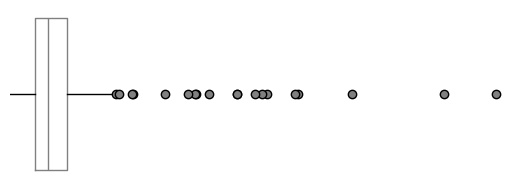

In [28]:
#coding=utf-8
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import colors
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter, AutoMinorLocator)
from matplotlib.gridspec import GridSpec
import mapclassify as mc
import matplotlib.patches as mpatches
import matplotlib.image as mpimg
from scipy import interpolate
from plotnine import *
import skmisc
# from skmisc.loess import loess
from scipy.interpolate import make_interp_spline,BSpline


# Smooth function
def np_move_avg(a, n, smooth, mode="same"):
    return np.convolve(a, np.ones((n,)) / n, mode=mode) if smooth else a

#计算中位数
def count_median(lis):
    if len(lis) % 2 == 0:
        mid = float((lis[len(lis) / 2] + lis[len(lis) / 2 - 1])) / 2
    else:
        mid = lis[len(lis) / 2]
    return mid
#计算上下四分位数
def count_quartiles(lis):
    q1 = 1 + (float(len(lis)) - 1) * 1 / 4
    q3 = 1 + (float(len(lis)) - 1) * 3 / 4
    return q1, q3

datafile = 'bokeh-app/data/Geographical name_normalization.csv'
data=pd.read_csv(datafile,usecols=[0,1,2,3],names=['contry','normalization','number','count'])

#low -> high
colorslist = ['#DDEFB1','#FEF4C0','#FEEEBA','#FEE1AA','#FDC68A','#FBBB7F','#FBBA7E','#F5A374','#EF8F6B','#EB7547','#DF5952','#DC402D','#D83428']
mycmaps = colors.LinearSegmentedColormap.from_list('mylist',colorslist,N=100)

fig = plt.figure()

# ax1 = plt.subplot(211)

# x = data['number'][0:10]
# y = data['count'][0:10]

# x_new = np.linspace(x.min(),x.max(),300) #300 represents number of points to make between T.min and T.max
# y_smooth = make_interp_spline(x,y)(x_new)
# print(y_smooth)
# plt.plot(xnew,power_smooth)

# 移除 NaN 值
cleaned_data = merged['geographic_heterogeneity'][0:200].dropna()

ax2 = plt.subplot(212,facecolor='#EFF5FA')
print(merged['geographic_heterogeneity'][0:200])
f = ax2.boxplot(
    # 绘图数据
    x = cleaned_data,
    vert = False,
    widths=2,
    boxprops = {'color':'gray'},
    showcaps=False,
    flierprops = {'marker':'o','markerfacecolor':'gray','color':'none'},
    medianprops= {'linestyle':'-','color':'gray'}
    )
# 调整横坐标范围
# ax2.set_xlim(0, 1)
# background_colors = ['#EFF5FA']
# mycmaps = colors.LinearSegmentedColormap.from_list('mylist',background_colors)
# ax2.imshow(data['normalization'][2:193],cmap=mycmaps,extent=[2,193,0,60],aspect='auto')

# 自动调整横坐标范围
ax2.set_xlim(cleaned_data.min(), cleaned_data.max()+2)
ax2.axis('off')  # 去坐标轴
plt.show()

In [ ]:
# Box figure
ax1 = fig.add_axes([0.162,0.165,0.128,0.11])# position[xmin,xmax,ymin,ymax]
# Take the data on the interval (0,65]
# print(data['normalization'][1:152])
f = ax1.boxplot(
    # The drawing data
    x = data['normalization'][5:151],
    vert = False,
    widths=0.18,
    patch_artist=True,
    boxprops = {'color':'gray','facecolor':'white','linewidth':'0.5'},
    showcaps=False,
    flierprops = {'marker':'o','markerfacecolor':'black','color':'black','markersize':'0.5'},
    medianprops= {'linestyle':'-','color':'gray','linewidth':'0.5'},
    whiskerprops={'color':'gray','linewidth':'0.5'}
    )
ax1.axis('off')  # Get rid of the scale

In [8]:
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
import matplotlib as mpl
from scipy.interpolate import make_interp_spline

shapefile = 'bokeh-app/data/countries_110m/ne_110m_admin_0_countries.shp'

#Read shapefile using Geopandas
gdf = gpd.read_file(shapefile)[['ADMIN', 'ADM0_A3', 'geometry']]

#Rename columns.
gdf.columns = ['country', 'country_code', 'geometry']
gdf = gdf.drop(gdf.index[159]) # The width of the map

# #Drop row corresponding to 'Antarctica'
datafile = 'bokeh-app/data/Geographical name_normalization.csv'
data=pd.read_csv(datafile,usecols=[0,1,2,3],names=['country','normalization','number','count'])# import data
print(data['normalization'])

#Read data to json.
data = gpd.GeoDataFrame(data)
merged = gdf.merge(data,on = 'country',how='left')

#low -> high
colorslist = ['#DDEFB1','#FEF4C0','#FEEEBA','#FEE1AA','#FDC68A','#FBBB7F','#FBBA7E','#F5A374','#EF8F6B','#EB7547','#DF5952','#DC402D','#D83428']
mycmaps = colors.LinearSegmentedColormap.from_list('mylist',colorslist,N=100)
# Word typical, pass in the personalization parameters related to the layered color.
# In this experiment, the X-axis data range is 0-100, and the interval is 1
# color_bin = [0,0.000005,0.00001,0.00005,0.0001,0.0005,0.001,0.005,0.01,0.05,0.1,0.2,0.3,0.4]
color_bin = np.arange(0,0.5,0.001)
# print(color_bin)
fig,ax = plt.subplots(figsize = (10,6))

merged['coords'] = merged['geometry'].apply(lambda x: x.representative_point().coords[0])

merged.plot(
    column = 'normalization',
    scheme = 'userdefined',
    classification_kwds = {'bins':color_bin},
    cmap = mycmaps,
    edgecolor = 'gray',
    linewidth = 0.5,
    ax = ax,
    missing_kwds={"color":"lightgray","edgecolor": "gray"}
)

plt.xlim(-182,182)
plt.ylim(-58,86)

plt.axis('off')  # Get rid of the axes
# background color
fig.set_facecolor("#EFF5FA")
# Colorbar label
plt.text(-113,-48,'>0.5',family = 'Times New Roman',fontsize = 7)
plt.text(-166,-48,'0',family = 'Times New Roman',fontsize = 7)
plt.text(-140,-48,'0.25',family = 'Times New Roman',fontsize = 7)
plt.text(-160,-52,'Geographical name (s.d.)',family = 'Times New Roman',fontsize = 7)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
# colorbar
sm = plt.cm.ScalarMappable(cmap=mycmaps)
position=fig.add_axes([0.167, 0.185, 0.12, 0.02])# position[xmin,xmax,ymin,ymax]
cb=plt.colorbar(sm,cax=position,orientation='horizontal',drawedges=False)#The direction of colorbar
cb.outline.set_visible(False)
cb.set_ticks([])  # Get rid of the scale

# Box figure
ax1 = fig.add_axes([0.162,0.165,0.128,0.11])# position[xmin,xmax,ymin,ymax]
# Take the data on the interval (0,65]
# print(data['normalization'][1:152])
f = ax1.boxplot(
    # The drawing data
    x = data['normalization'][5:151],
    vert = False,
    widths=0.18,
    patch_artist=True,
    boxprops = {'color':'gray','facecolor':'white','linewidth':'0.5'},
    showcaps=False,
    flierprops = {'marker':'o','markerfacecolor':'black','color':'black','markersize':'0.5'},
    medianprops= {'linestyle':'-','color':'gray','linewidth':'0.5'},
    whiskerprops={'color':'gray','linewidth':'0.5'}
    )
ax1.axis('off')  # Get rid of the scale

x = data['number'][0:10]
y = data['count'][0:10]
# Use scipy. Interpolate. Spline to fit the curve
x_new = np.linspace(x.min(),x.max(),300) #300 represents number of points to make between x.min and x.max
y_smooth = make_interp_spline(x,y)(x_new)

# Normal distribution diagram
ax2 = fig.add_axes([0.167,0.235,0.12,0.09])# position[xmin,xmax,ymin,ymax]
ax2.set(xlim=(0,max(x_new)), ylim=(-0.3,max(y_smooth)+0.1), autoscale_on=False)
# Color mapping fills the area under the curve
fill_bins = np.arange(0,101,1)
a = np.array([color_bin,color_bin])
ax2.imshow(a, interpolation='bicubic', extent=(0,max(x_new), -0.3,max(y_smooth)),cmap=mycmaps,aspect='auto')
# The background color fills part of the area on the curve
ax2.fill_between(x_new,y_smooth,max(y_smooth)+0.1,color='#EFF5FA')
ax2.plot(x_new,y_smooth,color='gray',linestyle='-',linewidth=0.5)
ax2.axis('off')  # Get rid of the scale

# plt.show()
plt.savefig('picture/result_mycmaps_dpi=150.jpg', bbox_inches='tight', pad_inches = 0,dpi=150)
plt.savefig('picture/result_mycmaps_dpi=150.png', bbox_inches='tight', pad_inches = 0,dpi=150)
plt.savefig('picture/result_mycmaps_dpi=150.tiff', bbox_inches='tight', pad_inches = 0,dpi=150)



0      28.2208
1      18.2601
2      12.1636
3       7.2946
4       2.6922
        ...   
234     0.0000
235     0.0000
236     0.0000
237     0.0000
238     0.0000
Name: normalization, Length: 239, dtype: float64


findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.


TypeError: must be real number, not str

<Figure size 1000x600 with 4 Axes>

findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.


TypeError: must be real number, not str

<Figure size 1000x600 with 4 Axes>

findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.


TypeError: must be real number, not str

<Figure size 1000x600 with 4 Axes>